<a href="https://colab.research.google.com/github/Vaishnavi741/STOCK-PREDICTION12/blob/main/Linear_Regression_for_spot_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
dir="/content/drive/MyDrive/Colab Notebooks/Aug31_Price_series (1).xlsx"
data=pd.read_excel(dir,index_col='time HHMMSS')

In [4]:
data

,Spot price ltp NIFTY50,Price of Synthetic option derived future,price NIFTY23AUGFUT
time HHMMSS,,,
09:15:01,19375.55,19358.529510,19359.125
09:15:10,19361.80,19338.013578,19340.300
09:15:51,19358.50,19341.881400,19342.100
09:16:31,19374.25,19355.645595,19355.450
09:17:11,19374.25,19355.705598,19356.450
...,...,...,...
15:26:59,19262.45,19253.006319,19251.850
15:27:39,19272.85,19253.304164,19252.500
15:28:19,19283.15,19254.661953,19253.200


In [5]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

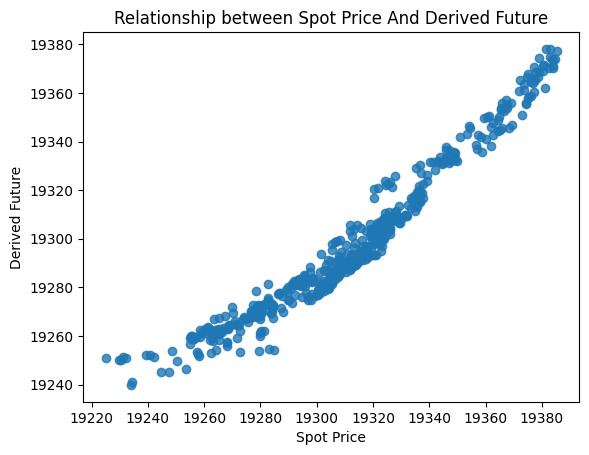

In [6]:
plt.scatter(data['Spot price ltp NIFTY50'],data['Price of Synthetic option derived future'],alpha=0.8)
plt.title('Relationship between Spot Price And Derived Future')
plt.xlabel('Spot Price')
plt.ylabel('Derived Future')
plt.show()


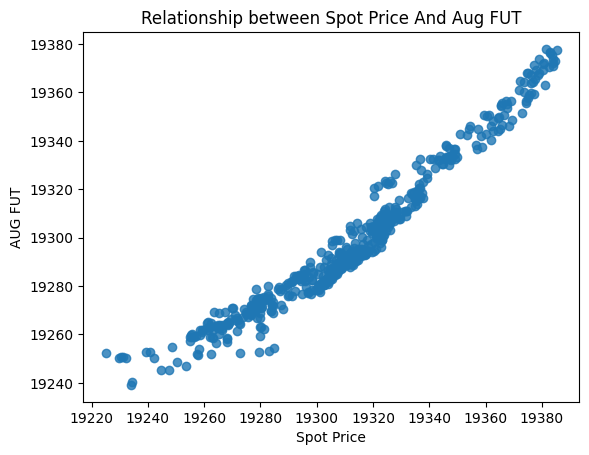

In [7]:
plt.scatter(data['Spot price ltp NIFTY50'],data['price NIFTY23AUGFUT'],alpha=0.8)
plt.title('Relationship between Spot Price And Aug FUT')
plt.xlabel('Spot Price')
plt.ylabel('AUG FUT')
plt.show()

In [8]:
X = data[['price NIFTY23AUGFUT','Price of Synthetic option derived future']].values
y = data['Spot price ltp NIFTY50'].values
print(X)


[[19359.125      19358.52951049]
 [19340.3        19338.01357848]
 [19342.1        19341.88140031]
 ...
 [19253.2        19254.66195256]
 [19254.5        19254.31277906]
 [19252.825      19254.03573935]]


In [9]:
#print(X)
#print(y)

In [10]:

size = int(len(X) * 0.66)
x_train, x_test = X[0:size], X[size:len(X)]
y_train,y_test=y[0:size], y[size:len(X)]
history = [x for x in x_train]
predictions = list()
print(history)

[array([19359.125     , 19358.52951049]), array([19340.3       , 19338.01357848]), array([19342.1       , 19341.88140031]), array([19355.45      , 19355.64559487]), array([19356.45      , 19355.70559824]), array([19357.6       , 19357.76812239]), array([19363.15      , 19362.03799722]), array([19359.575     , 19358.74612612]), array([19359.15      , 19360.46627525]), array([19350.6       , 19352.47521398]), array([19354.75      , 19353.12459455]), array([19354.425     , 19353.82549903]), array([19350.85      , 19350.49768399]), array([19350.25      , 19350.17141126]), array([19350.525    , 19349.5215243]), array([19344.95      , 19346.31019342]), array([19342.925     , 19341.83894121]), array([19345.925     , 19345.65303231]), array([19337.85      , 19337.96296625]), array([19338.175     , 19336.37752848]), array([19332.3       , 19330.53202869]), array([19322.7       , 19322.30907015]), array([19323.5       , 19323.35726653]), array([19320.4       , 19320.35361346]), array([19326.45  

In [11]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [12]:
regressor.intercept_,regressor.coef_

(2162.292165494513, array([0.64648687, 0.24243741]))

In [13]:
y_pred_train=regressor.predict(x_train)

In [14]:
residual=y_pred_train-y_train


In [15]:
y_pred=regressor.predict(x_test)

In [16]:
mean_squared_error(y_test, y_pred)

305.7119771003621

In [17]:
mean_squared_error(y_train, y_pred_train)

18.85723731468222

In [18]:
r2_score(y_train, y_pred_train)

0.9693982273301088

In [19]:
r2_score(y_test, y_pred)

0.23771818265594136

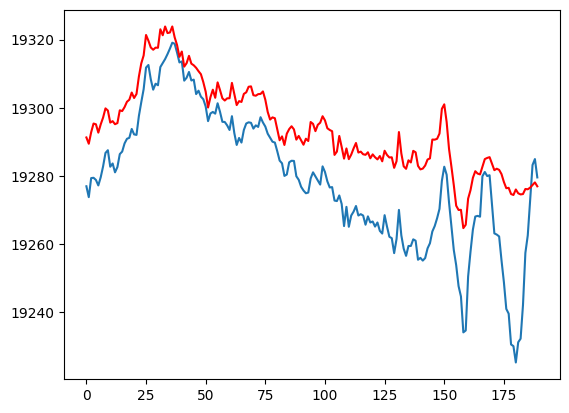

In [20]:
plt.plot(y_test)
plt.plot(y_pred, color='red')
plt.show()

In [46]:
#Regularization
# create an array of alpha values
alpha_range = 10.**np.arange(-2, 3)
#alpha_range
#array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])
# select the best alpha with RidgeCV
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=1,scoring='neg_mean_squared_error')
ridgeregcv.fit(x_train, y_train)
# predict method uses the best alpha value
y_pred1 = ridgeregcv.predict(x_test)

r2_score(y_test, y_pred1)


0.2376462185110335

In [63]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=8,random_state=1)
lassoregcv.fit(x_train, y_train)
y_pred2=lassoregcv.predict(x_test)
r2_score(y_test, y_pred2)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.756e+01, tolerance: 2.268e+01
  model = cd_fast.enet_coordinate_descent(


0.17856920811522414